### Imports

In [2]:
import pandas as pd
import torch

from sklearn.preprocessing import StandardScaler

### EDA

In [3]:
dish = pd.read_csv("data/dish.csv")
dish.head()

,dish_id,total_calories,total_mass,ingredients,split
0,dish_1561662216,300.794281,193.0,ingr_0000000508;ingr_0000000122;ingr_000000002...,test
1,dish_1561662054,419.438782,292.0,ingr_0000000312;ingr_0000000026;ingr_000000002...,train
2,dish_1562008979,382.936646,290.0,ingr_0000000448;ingr_0000000520;ingr_000000046...,test
3,dish_1560455030,20.590000,103.0,ingr_0000000471;ingr_0000000031;ingr_0000000347,train
4,dish_1558372433,74.360001,143.0,ingr_0000000453,train


In [4]:
ingredients = pd.read_csv("data/ingredients.csv")
ingredients.head()

,id,ingr
0,1,cottage cheese
1,2,strawberries
2,3,garden salad
3,4,bacon
4,5,potatoes


In [5]:
ingredients["id"].max()

np.int64(555)

Добавление списка названий ингредиентов из 2 df место их id, поскольку масимальный id = 555, ножно оставить лишь последние 3 символа

In [6]:
ingr = dish["ingredients"].to_dict()
ingr

{0: 'ingr_0000000508;ingr_0000000122;ingr_0000000026;ingr_0000000524;ingr_0000000094;ingr_0000000023;ingr_0000000189;ingr_0000000054;ingr_0000000029;ingr_0000000328;ingr_0000000291;ingr_0000000520;ingr_0000000161;ingr_0000000462;ingr_0000000525;ingr_0000000312;ingr_0000000513',
 1: 'ingr_0000000312;ingr_0000000026;ingr_0000000029;ingr_0000000122;ingr_0000000508;ingr_0000000513;ingr_0000000520;ingr_0000000525;ingr_0000000161;ingr_0000000094;ingr_0000000189;ingr_0000000043;ingr_0000000462;ingr_0000000054;ingr_0000000328;ingr_0000000291;ingr_0000000524',
 2: 'ingr_0000000448;ingr_0000000520;ingr_0000000462;ingr_0000000514;ingr_0000000152;ingr_0000000312;ingr_0000000291;ingr_0000000045;ingr_0000000122;ingr_0000000006;ingr_0000000161;ingr_0000000524;ingr_0000000116',
 3: 'ingr_0000000471;ingr_0000000031;ingr_0000000347',
 4: 'ingr_0000000453',
 5: 'ingr_0000000032;ingr_0000000523;ingr_0000000161;ingr_0000000526;ingr_0000000520;ingr_0000000094;ingr_0000000031;ingr_0000000291;ingr_0000000515;

In [7]:
words = {}
for key in ingr:
    w = ingr[key].replace("ingr_0000000", "")
    words.setdefault(key, w)
words

{0: '508;122;026;524;094;023;189;054;029;328;291;520;161;462;525;312;513',
 1: '312;026;029;122;508;513;520;525;161;094;189;043;462;054;328;291;524',
 2: '448;520;462;514;152;312;291;045;122;006;161;524;116',
 3: '471;031;347',
 4: '453',
 5: '032;523;161;526;520;094;031;291;515;448;014;367;349;471',
 6: '008;192;440;128;161;437',
 7: '291;335;433;007;161',
 8: '122;021;471;244;036;148;514;161;518;112;291;027',
 9: '510',
 10: '013',
 11: '312;517;201;046;189;515;126;161;124;291',
 12: '133;332;046;540;021;257;520;434;367;122;011;092;341;023;448;036;025;074;518;161;027;094;485;291;523;203',
 13: '077;005',
 14: '073;525;189;291;433;029;508;006;122;328;312;026;462;180;152;380;161;045;535',
 15: '126;189;029;528;161;291;471',
 16: '128;015;013;437',
 17: '523;122;161;392;520;094;189;201;291;006;010;072;448;036;126;026;073;038',
 18: '471;007;367;116;448;392;524;189;520;152;029;030;291;312;038;462;514;094;031;161;122;045',
 19: '192;437;001;038;121;161;013',
 20: '008',
 21: '471',
 22: '

In [8]:
df_ingr = ingredients.copy()
df_ingr.set_index('id', inplace=True)
names_ing = df_ingr["ingr"].to_dict()
names_ing 

{1: 'cottage cheese',
 2: 'strawberries',
 3: 'garden salad',
 4: 'bacon',
 5: 'potatoes',
 6: 'caesar salad',
 7: 'cauliflower',
 8: 'scrambled eggs',
 9: 'wild rice',
 10: 'steak',
 11: 'cheese pizza',
 12: 'olives',
 13: 'berries',
 14: 'asparagus',
 15: 'hash browns',
 16: 'brussels sprouts',
 17: 'pasta salad',
 18: 'turkey',
 19: 'bread',
 20: 'duck',
 21: 'squash',
 22: 'guacamole',
 23: 'brown rice',
 24: 'artic char',
 25: 'beef',
 26: 'white rice',
 27: 'broccoli',
 28: 'chicken',
 29: 'mixed greens',
 30: 'lettuce',
 31: 'cucumbers',
 32: 'tomatoes',
 33: 'bell peppers',
 34: 'celery',
 35: 'blue cheese',
 36: 'spinach (raw)',
 37: 'cantaloupe',
 38: 'pineapple',
 39: 'sausage',
 40: 'raspberries',
 41: 'blackberries',
 42: 'avocado',
 43: 'green beans',
 44: 'bean sprouts',
 45: 'carrot',
 46: 'mushroom',
 47: 'corn',
 48: 'ham',
 49: 'fish',
 50: 'tofu',
 51: 'shrimp',
 52: 'cheese',
 53: 'nuts',
 54: 'apple',
 55: 'banana',
 56: 'kiwi',
 57: 'lemon',
 58: 'orange',
 59: '

In [9]:
gg = {}
for key in words:
    w = [names_ing[int(val)] for val in words[key].split(';')]
    res = ";".join([str(s) for s in w])
    gg.setdefault(key, res)
gg

{0: 'soy sauce;garlic;white rice;parsley;onions;brown rice;vinegar;apple;mixed greens;sugar;salt;lemon juice;olive oil;pork;bok choy;pepper;millet',
 1: 'pepper;white rice;mixed greens;garlic;soy sauce;millet;lemon juice;bok choy;olive oil;onions;vinegar;green beans;pork;apple;sugar;salt;parsley',
 2: 'jalapenos;lemon juice;pork;wheat berry;cabbage;pepper;salt;carrot;garlic;caesar salad;olive oil;parsley;mayonnaise',
 3: 'cherry tomatoes;cucumbers;baby carrots',
 4: 'deprecated',
 5: 'tomatoes;cilantro;olive oil;mustard greens;lemon juice;onions;cucumbers;salt;arugula;jalapenos;asparagus;lime;mangos;cherry tomatoes',
 6: 'scrambled eggs;yam;grapes;egg whites;olive oil;sweet potato',
 7: 'salt;eggplant;roasted potatoes;cauliflower;olive oil',
 8: 'garlic;squash;cherry tomatoes;chicken breast;spinach (raw);parmesan cheese;wheat berry;olive oil;thyme;honeydew melons;salt;broccoli',
 9: 'chicken apple sausage',
 10: 'berries',
 11: 'pepper;chard;blueberries;mushroom;vinegar;arugula;mustard

In [10]:
dish['ing_names'] = gg
dish

,dish_id,total_calories,total_mass,ingredients,split,ing_names
0,dish_1561662216,300.794281,193.0,ingr_0000000508;ingr_0000000122;ingr_000000002...,test,soy sauce;garlic;white rice;parsley;onions;bro...
1,dish_1561662054,419.438782,292.0,ingr_0000000312;ingr_0000000026;ingr_000000002...,train,pepper;white rice;mixed greens;garlic;soy sauc...
2,dish_1562008979,382.936646,290.0,ingr_0000000448;ingr_0000000520;ingr_000000046...,test,jalapenos;lemon juice;pork;wheat berry;cabbage...
3,dish_1560455030,20.590000,103.0,ingr_0000000471;ingr_0000000031;ingr_0000000347,train,cherry tomatoes;cucumbers;baby carrots
4,dish_1558372433,74.360001,143.0,ingr_0000000453,train,deprecated
...,...,...,...,...,...,...
3257,dish_1563295334,228.540009,96.0,ingr_0000000004;ingr_0000000008,train,bacon;scrambled eggs
3258,dish_1566329234,262.625214,457.0,ingr_0000000161;ingr_0000000189;ingr_000000000...,train,olive oil;vinegar;cauliflower;bok choy;millet;...
3259,dish_1562691737,485.676880,700.0,ingr_0000000543;ingr_0000000027;ingr_000000012...,train,chia seeds;broccoli;egg whites;yam;chicken app...
3260,dish_1558458496,53.130001,77.0,ingr_0000000440,train,grapes


In [11]:
ingredients[ingredients['id'] == 440]

,id,ingr
439,440,grapes


In [12]:
dish.to_csv('data/ish_with_names.csv')

In [13]:
dish = dish.drop(columns=["ingredients"])

Нормализация числовых параметров для обучения total_mass и total_calories

In [14]:
scaler_mass = StandardScaler()
scaler_calories = StandardScaler()
dish['total_mass_scaled'] = scaler_mass.fit_transform(dish['total_mass'].values.reshape(-1, 1))
dish['total_calories_scaled'] = scaler_calories.fit_transform(dish['total_calories'].values.reshape(-1, 1))
dish.head()

,dish_id,total_calories,total_mass,split,ing_names,total_mass_scaled,total_calories_scaled
0,dish_1561662216,300.794281,193.0,test,soy sauce;garlic;white rice;parsley;onions;bro...,-0.136123,0.208473
1,dish_1561662054,419.438782,292.0,train,pepper;white rice;mixed greens;garlic;soy sauc...,0.476984,0.748739
2,dish_1562008979,382.936646,290.0,test,jalapenos;lemon juice;pork;wheat berry;cabbage...,0.464598,0.582521
3,dish_1560455030,20.590000,103.0,train,cherry tomatoes;cucumbers;baby carrots,-0.693492,-1.067480
4,dish_1558372433,74.360001,143.0,train,deprecated,-0.445772,-0.822630


Резделение df на train и test

In [15]:
train_dish = dish[dish['split'] == "train"]
train_dish

,dish_id,total_calories,total_mass,split,ing_names,total_mass_scaled,total_calories_scaled
1,dish_1561662054,419.438782,292.0,train,pepper;white rice;mixed greens;garlic;soy sauc...,0.476984,0.748739
3,dish_1560455030,20.590000,103.0,train,cherry tomatoes;cucumbers;baby carrots,-0.693492,-1.067480
4,dish_1558372433,74.360001,143.0,train,deprecated,-0.445772,-0.822630
5,dish_1565640549,45.482903,139.0,train,tomatoes;cilantro;olive oil;mustard greens;lem...,-0.470544,-0.954126
6,dish_1563207364,309.269989,271.0,train,scrambled eggs;yam;grapes;egg whites;olive oil...,0.346931,0.247069
...,...,...,...,...,...,...,...
3257,dish_1563295334,228.540009,96.0,train,bacon;scrambled eggs,-0.736843,-0.120548
3258,dish_1566329234,262.625214,457.0,train,olive oil;vinegar;cauliflower;bok choy;millet;...,1.498829,0.034665
3259,dish_1562691737,485.676880,700.0,train,chia seeds;broccoli;egg whites;yam;chicken app...,3.003728,1.050365
3260,dish_1558458496,53.130001,77.0,train,grapes,-0.854510,-0.919304


In [16]:
test_dish = dish[dish['split'] == "test"]
test_dish

,dish_id,total_calories,total_mass,split,ing_names,total_mass_scaled,total_calories_scaled
0,dish_1561662216,300.794281,193.0,test,soy sauce;garlic;white rice;parsley;onions;bro...,-0.136123,0.208473
2,dish_1562008979,382.936646,290.0,test,jalapenos;lemon juice;pork;wheat berry;cabbage...,0.464598,0.582521
16,dish_1561739238,274.190002,257.0,test,egg whites;hash browns;berries;sweet potato,0.260229,0.087327
23,dish_1562691032,419.681702,415.0,test,berries;olive oil;pineapple;scrambled eggs;roa...,1.238723,0.749845
26,dish_1558549773,2.300000,10.0,test,spinach (raw),-1.269441,-1.150766
...,...,...,...,...,...,...,...
3235,dish_1562690950,109.061714,202.0,test,pineapple;broccoli;berries;olive oil,-0.080386,-0.664610
3237,dish_1558461792,331.000000,233.0,test,grapes;spinach (raw);cherry tomatoes;almonds,0.111597,0.346020
3245,dish_1562700568,246.864426,318.0,test,fish;pepper;arugula;lemon juice;parsley;snow p...,0.638002,-0.037105
3249,dish_1564686966,153.204697,65.0,test,ketchup;millet;salt;bell peppers;olive oil;spi...,-0.928826,-0.463599


In [17]:
test_dish.to_csv('data/test_dish.csv')
train_dish.to_csv('data/train_dish.csv')

### Обучение

In [18]:
from scripts.utils import train


class Config:
    # для воспроизводимости
    SEED = 42
    # Модели
    TEXT_MODEL_NAME = "bert-base-uncased"
    IMAGE_MODEL_NAME = "tf_efficientnet_b0"
    # Какие слои размораживаем - совпадают с нэймингом в моделях
    TEXT_MODEL_UNFREEZE = "encoder.layer.11|pooler"
    IMAGE_MODEL_UNFREEZE = "blocks.6|conv_head|bn2"
    # Гиперпараметры
    BATCH_SIZE = 128
    TEXT_LR = 3e-5
    IMAGE_LR = 1e-4
    FC_LR = 1e-3
    MASS_LR = 1e-3
    EPOCHS = 30
    DROPOUT = 0.3
    HIDDEN_DIM = 256
    NUM_CLASSES = 1
    # Пути
    TRAIN_DF_PATH = "data/train_dish.csv"
    TEST_DF_PATH = "data/test_dish.csv"
    SAVE_PATH = "model/best_model.pth"

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
cfg = Config()
train(cfg, device)

/home/ubuntu/project_sprint4/Multimodal_project/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda
Training started
Epoch 0/29 | avg_Loss: 0.7611 | Train MAE: 0.7611| Val MAE: 0.8050
Epoch 1/29 | avg_Loss: 0.7571 | Train MAE: 0.7571| Val MAE: 0.7714
Epoch 2/29 | avg_Loss: 0.7631 | Train MAE: 0.7631| Val MAE: 0.7941
Epoch 3/29 | avg_Loss: 0.7350 | Train MAE: 0.7350| Val MAE: 0.7365
Epoch 4/29 | avg_Loss: 0.7051 | Train MAE: 0.7051| Val MAE: 0.6969
Epoch 5/29 | avg_Loss: 0.6715 | Train MAE: 0.6715| Val MAE: 0.6637
Epoch 6/29 | avg_Loss: 0.6378 | Train MAE: 0.6378| Val MAE: 0.6593
Epoch 7/29 | avg_Loss: 0.6053 | Train MAE: 0.6053| Val MAE: 0.6328
Epoch 8/29 | avg_Loss: 0.5909 | Train MAE: 0.5909| Val MAE: 0.6808
Epoch 9/29 | avg_Loss: 0.5945 | Train MAE: 0.5945| Val MAE: 0.6304
Epoch 10/29 | avg_Loss: 0.5807 | Train MAE: 0.5807| Val MAE: 0.6331
Epoch 11/29 | avg_Loss: 0.5557 | Train MAE: 0.5557| Val MAE: 0.6391
Epoch 12/29 | avg_Loss: 0.5629 | Train MAE: 0.5629| Val MAE: 0.6135
Epoch 13/29 | avg_Loss: 0.5370 | Train MAE: 0.5370| Val MAE: 0.5886 - New best model
Epoch 14/29 | avg_L

### Тестирование

Testing started
avg_MAE: 0.4993
Top 5 with MAX MAE:


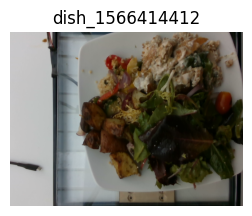

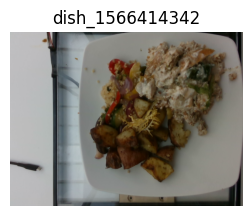

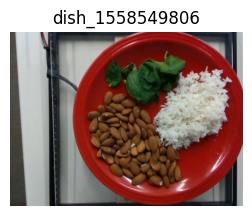

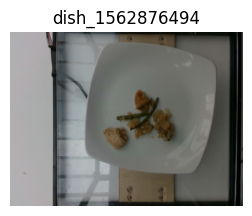

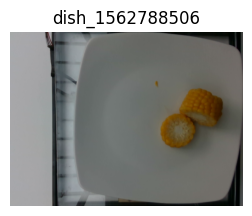

In [20]:
from scripts.utils import test

class Config:
    # для воспроизводимости
    SEED = 42
    # Модели
    TEXT_MODEL_NAME = "bert-base-uncased"
    IMAGE_MODEL_NAME = "tf_efficientnet_b0"
    # Гиперпараметры
    BATCH_SIZE = 128
    HIDDEN_DIM = 256
    NUM_CLASSES = 1
    # Пути
    TEST_DF_PATH = "data/test_dish.csv"
    LOAD_PATH = "model/best_model.pth"

device = "cuda" if torch.cuda.is_available() else "cpu"
cfg = Config()

test(cfg, device)

Если смотреть по топ 5 ошибка на тесте, то можно сказать, что на 3 картинку могла повлиять красная тарелка, 
в остальных случая возможно проблема в том, что там есть гора из одинаковых ингредиентов, что затрудняет определение их количества.